In [2]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

from math import sqrt

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.linear_model import SGDRegressor
import numpy as np

from sklearn.linear_model import Ridge, Lasso

/var/folders/0g/ygg81pxx68zfs73cm7nr44nr0000gn/T/ipykernel_87814/783297121.py:19: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Аудиторная работа (с использованием датасета iris)
X, y = datasets.load_iris(return_X_y=True)

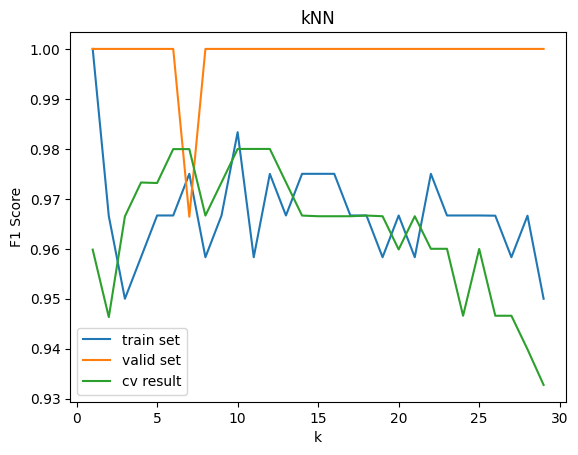

In [5]:
k_list = list(range(1, 30))
t_list = []
v_list = []
c_list = []

# train_test_split X y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for k in k_list:

    # fit kNN(k) 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # f1 on X train -› y_pred -› f1_score(y_train, y_pred)
    y_train_pred = knn.predict(X_train)
    t = f1_score(y_train, y_train_pred, average='weighted')

    # f1 on X_test →› y_pred →› f1_score(y_test, y_pred)
    y_test_pred = knn.predict(X_test)
    v = f1_score(y_test, y_test_pred, average='weighted')

    # f1 from cv 
    c = cross_val_score(knn, X, y, cv=5, scoring='f1_weighted').mean()
    
    v_list.append(v)
    t_list.append(t) 
    c_list.append(c)   

plt.plot(k_list, t_list, label="train set")
plt.plot(k_list, v_list, label="valid set")
plt.plot(k_list, c_list, label="cv result")
plt.legend()
plt.xlabel('k')
plt.ylabel('F1 Score')
plt.title('kNN')
plt.show()

In [6]:
# Домашняя работа (с использованиям обработонного в прошлом ДЗ titanic.csv)
# Я загрузил pandas, чтобы выделить целевую переменную ниже
titanic = pd.read_csv("my_titanic.csv")

In [7]:
titanic.head()

,Sex,Pclass,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,1.0,0.271174,0.125,0.0,0.014151,0,False,False,True,False
1,0,0.0,0.472229,0.125,0.0,0.139136,1,True,False,False,False
2,0,1.0,0.321438,0.000,0.0,0.015469,1,False,False,True,False
3,0,0.0,0.434531,0.125,0.0,0.103644,1,False,False,True,False
4,1,1.0,0.434531,0.000,0.0,0.015713,0,False,False,True,False


In [8]:
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

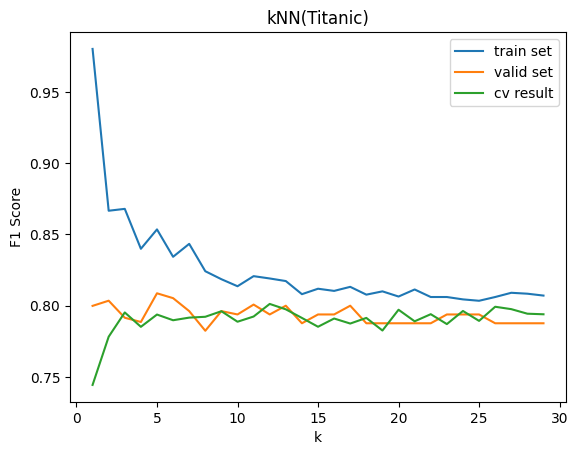

In [10]:
k_list = list(range(1, 30))
t_list = []
v_list = []
c_list = []

for k in k_list:
    # fit kNN(k) on train
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # f1 on X train
    y_train_pred = knn.predict(X_train)
    t = f1_score(y_train, y_train_pred, average='weighted')
    t_list.append(t) 

    # f1 on X_test
    y_test_pred = knn.predict(X_test)
    v = f1_score(y_test, y_test_pred, average='weighted')
    v_list.append(v)

    # Cross-validation (cv)
    scores = cross_val_score(knn, X, y, cv=5, scoring='f1_weighted')
    c = scores.mean()
    c_list.append(c)   

plt.plot(k_list, t_list, label="train set")
plt.plot(k_list, v_list, label="valid set")
plt.plot(k_list, c_list, label="cv result")
plt.legend()
plt.xlabel('k')
plt.ylabel('F1 Score')
plt.title('kNN(Titanic)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration re

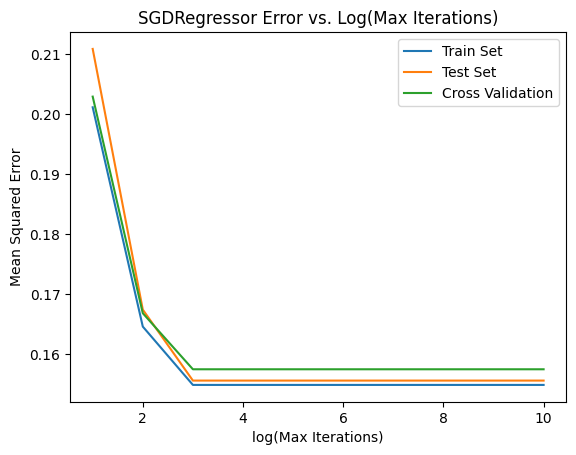

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_max_iter_list = range(1, 11)
max_iter_values = [int(np.exp(log_max_iter)) for log_max_iter in log_max_iter_list]

train_errors = []
test_errors = []
cv_errors = []

for max_iter in max_iter_values:
    sgd_reg = SGDRegressor(max_iter=max_iter, random_state=42)
    sgd_reg.fit(X_train, y_train)
    
    # Train 
    train_error = mean_squared_error(y_train, sgd_reg.predict(X_train))
    train_errors.append(train_error)
    
    # Test 
    test_error = mean_squared_error(y_test, sgd_reg.predict(X_test))
    test_errors.append(test_error)
    
    # C-V
    cv_error = -np.mean(cross_val_score(sgd_reg, X, y, cv=5, scoring='neg_mean_squared_error'))
    cv_errors.append(cv_error)

plt.plot(log_max_iter_list, train_errors, label="Train Set")
plt.plot(log_max_iter_list, test_errors, label="Test Set")
plt.plot(log_max_iter_list, cv_errors, label="Cross Validation")
plt.xlabel('log(Max Iterations)')
plt.ylabel('Mean Squared Error')
plt.title('SGDRegressor Error vs. Log(Max Iterations)')
plt.legend()
plt.show()


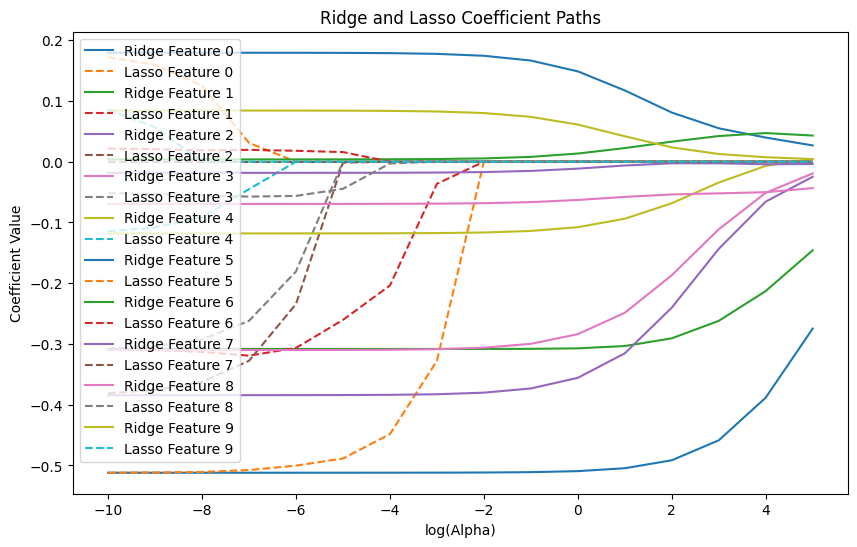

In [14]:
log_alpha_range = range(-10, 6)
alpha_values = [np.exp(log_alpha) for log_alpha in log_alpha_range]

ridge_coefs = []
lasso_coefs = []

for alpha in alpha_values:
    
    # Ridge регрессия
    ridge_reg = Ridge(alpha=alpha, random_state=42)
    ridge_reg.fit(X_train, y_train)
    ridge_coefs.append(ridge_reg.coef_)
    
    # Lasso регрессия
    lasso_reg = Lasso(alpha=alpha, random_state=42)
    lasso_reg.fit(X_train, y_train)
    lasso_coefs.append(lasso_reg.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(log_alpha_range, ridge_coefs[:, i], label=f'Ridge Feature {i}')
    plt.plot(log_alpha_range, lasso_coefs[:, i], linestyle='--', label=f'Lasso Feature {i}')

plt.xlabel('log(Alpha)')
plt.ylabel('Coefficient Value')
plt.title('Ridge and Lasso Coefficient Paths')
plt.legend()
plt.show()